In [ ]:
import numpy as np

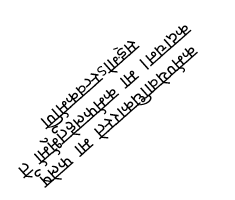

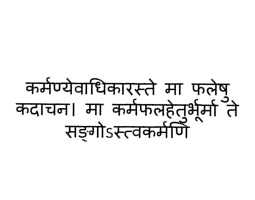

-1

In [ ]:
import cv2
from skimage.transform import hough_line, hough_line_peaks
from skimage.transform import rotate
from skimage.feature import canny
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from scipy.stats import mode
import numpy as np
from google.colab.patches import cv2_imshow

#from google.colab.patches import cv2_imshow


img=cv2.imread('/content/3_c.png')
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges=cv2.Canny(gray, 100, 200,apertureSize=3)

#gray=cv2.bitwise_not(gray)

#thresh=cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY )[1]
#edges=cv2.Canny(gray, 100, 200,aperturesize=3)
#coords = np.column_stack(np.where(thresh > 0))
#angle=cv2.minAreaRect(coords)[-1]

'''if angle < -45:
   angle=(-180+angle)

#if angle < 45:
 #  angle=angle+90

else:
  angle=-angle+90'''
tested_angles = np.deg2rad(np.arange(0.1, 180.0))
h, theta, d = hough_line(edges, theta=tested_angles)
accum, angles, dists = hough_line_peaks(h, theta, d)

    # round the angles to 2 decimal places and find the most common angle.
most_common_angle = mode(np.around(angles, decimals=2))[0]

    # convert the angle to degree for rotation.
skew_angle = np.rad2deg(most_common_angle - np.pi/2)


  #rotate the image to deskew it
(h,w)=img.shape[:2]
centre=((w) // 2, h // 2)
M=cv2.getRotationMatrix2D(centre, skew_angle+180, 1.0)
rotated=cv2.warpAffine(img, M, (w+20, h,), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

#draw the corrected angle on the image so we can vaildate it
#cv2.putText(rotated, "Angle: {:.2f} degrees".format(angle), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

#show the output image
'''printf("[INFO] angle: {:.3f}" .format(angle))'''
cv2_imshow(img)
cv2_imshow(rotated)
cv2.waitKey(0)

